# Breast Cancer Detection

# The Scenario
“About 1 in 8 U.S. women (about 13%) will develop invasive breast cancer over the course of her lifetime. <br>
In 2021, an estimated 281,550 new cases of invasive breast cancer are expected to be diagnosed in women in the U.S., along with 49,290 new cases of non-invasive (in situ) breast cancer.”<br>

A timely response is crucial so that real invasive cases are treated promptly, while we do not put those in non-invasive cases under unnecessary tests or procedures.<br>
However, there is a crunch on professionals to check on the reports.<br>
Is there a way to overcome this problem?<br>

Source: U.S. Breast Cancer Statistics. BreastCancer Org. https://www.breastcancer.org/symptoms/understand_bc/statistics

# Tips for working on this project
You will be using these two concepts to be able to successfully complete this project:
1. Supervised Learning models
2. AI Project Cycle <br>

If needed, please revise your notes on these topics.

# Section 1: Understand the Problem

One of the key points of solving an AI problem is to understand the problem statement correctly. <br>
You need to understand what is the correct problems that you are solving.<br>
You want to solve the root problem and not the symptoms.<br>
To do that, you can use tools like 5 Whys, decomposition, and Fish-bone diagram.<br>
You can then write your problem statement.<br>
It may include helpful information, like who is affected, what is the problem, where is it happening, and when does it happen.<br>
need more details to each.<br>

Based on the scenario above, write your problem statement in the cell below!<br>

In [1]:
#How can we effectively and efficiently determine when a positive breast cancer diagnosis is invasive or non-invasive based on reported test data?
#The ability to solve this problem is integral to providing patients with the MOST effective care while possibly reducing unecessary tests or treatments for
#those cases where it may be considered overly invasive.


# Section 2: Data Acquisition

Data is the main ingredient for AI model. <br>
Where can you find your data? <br>
Write your answer in the cell below. <br>

In this scenario, you are given a CSV file with the info.<br>
In the cell below, write down which column will serve as a target for your AI model?

In [2]:
# Our source data will be from a provided CSV source.
# I would suspect that Susak G. Koman or The American Cancer Society would be a good resource for similar research data?
# The Diagnosis Column will serve as a target for the AI model.


# Import libraries and insert the file

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Model 1 : KNN
from sklearn.neighbors import KNeighborsClassifier


# Model 2 : SVC
from sklearn.svm import SVC


# Model 3 : Decision Tree
from sklearn.tree import DecisionTreeClassifier


# import data source
df = pd.read_csv("https://raw.githubusercontent.com/tvlaz2020/cis230Week6/main/%5BDataset%5D_BreastCancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,NaN,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Section 3: Data Exploration

We need to clean the data.<br>
we want to make sure the data is clean.<br>
let's see how we can do it using this jupyter notebook<br>

## Any Missing Data?

In [7]:
# to see which columns having missing data (NaN), we can use a function inside pandas.
# Your answers here!
print(df.isnull().values.sum())
print(df.isnull().sum())


28
id                         0
diagnosis                  0
radius_mean                0
texture_mean               1
perimeter_mean             1
area_mean                  0
smoothness_mean            0
compactness_mean           1
concavity_mean             1
concave points_mean        1
symmetry_mean              0
fractal_dimension_mean     3
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              3
compactness_se             4
concavity_se               2
concave points_se          1
symmetry_se                3
fractal_dimension_se       0
radius_worst               1
texture_worst              3
perimeter_worst            0
area_worst                 2
smoothness_worst           1
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Fixing Missing Data
There are two methods we can try:<br>
1. remove missing data
2. fill missing data with a pre-set value <br>

In this exercise, we will be using the first method. <br>
If you want to use the second method, you will need to:
1. repeat the steps from the beginning
2. comment out the steps for method 1 so that you do not accidentally run it.

In [10]:
# To fix the problem of missing data, there are two possible methods:

# Option 1 : delete missing data row
# Your answers here!
df.dropna(inplace=True)
print(df.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [11]:
# Option 2 : replace missing data row
# Your answers here!
# mean_value = df['texture_mean'].mean()
# df["texture_mean"].fillna(value=mean_value, inplace=True)
# df

## Rename the column for Target
Let's rename from diagnosis to target, for better clarity.

B    342
M    201
Name: target, dtype: int64


<Axes: xlabel='target', ylabel='count'>

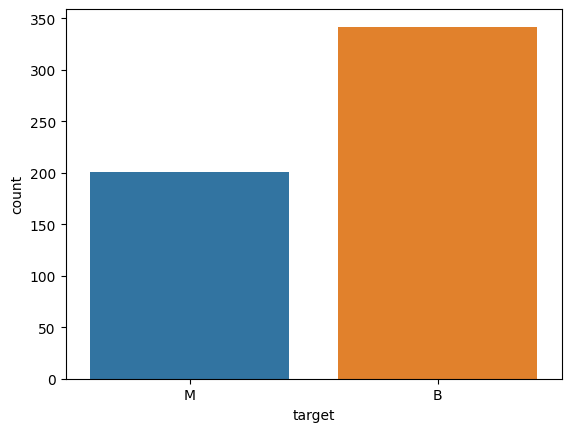

In [12]:
#The column 'diagnosis' has been renamed to 'target'.
df = df.rename(columns={'diagnosis':'target'})

# Can you plot a bar chart to show the number of benign cases (B) and malicious cases (M), using seaborn?
# Your answers here!

print(df.target.value_counts())
sns.countplot(df, x='target')

## Change the format for Target
In some of the models, the target need to be in numeric values.<br>
Therefore let's change the format from string to integer.

In [13]:
# Change the variable type for 'target' from string to a numeric variable.
# Your answers here!
df['target'] = [1 if i.strip()=='M' else 0 for i in df.target]
df

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.3174,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.2439,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1440,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.3514,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Seeing the Correlation
In data exploration, it is important to see the correlation between the features.
Can you find the correlations for all the columns?

Text(0.5, 1.0, 'Correlations')

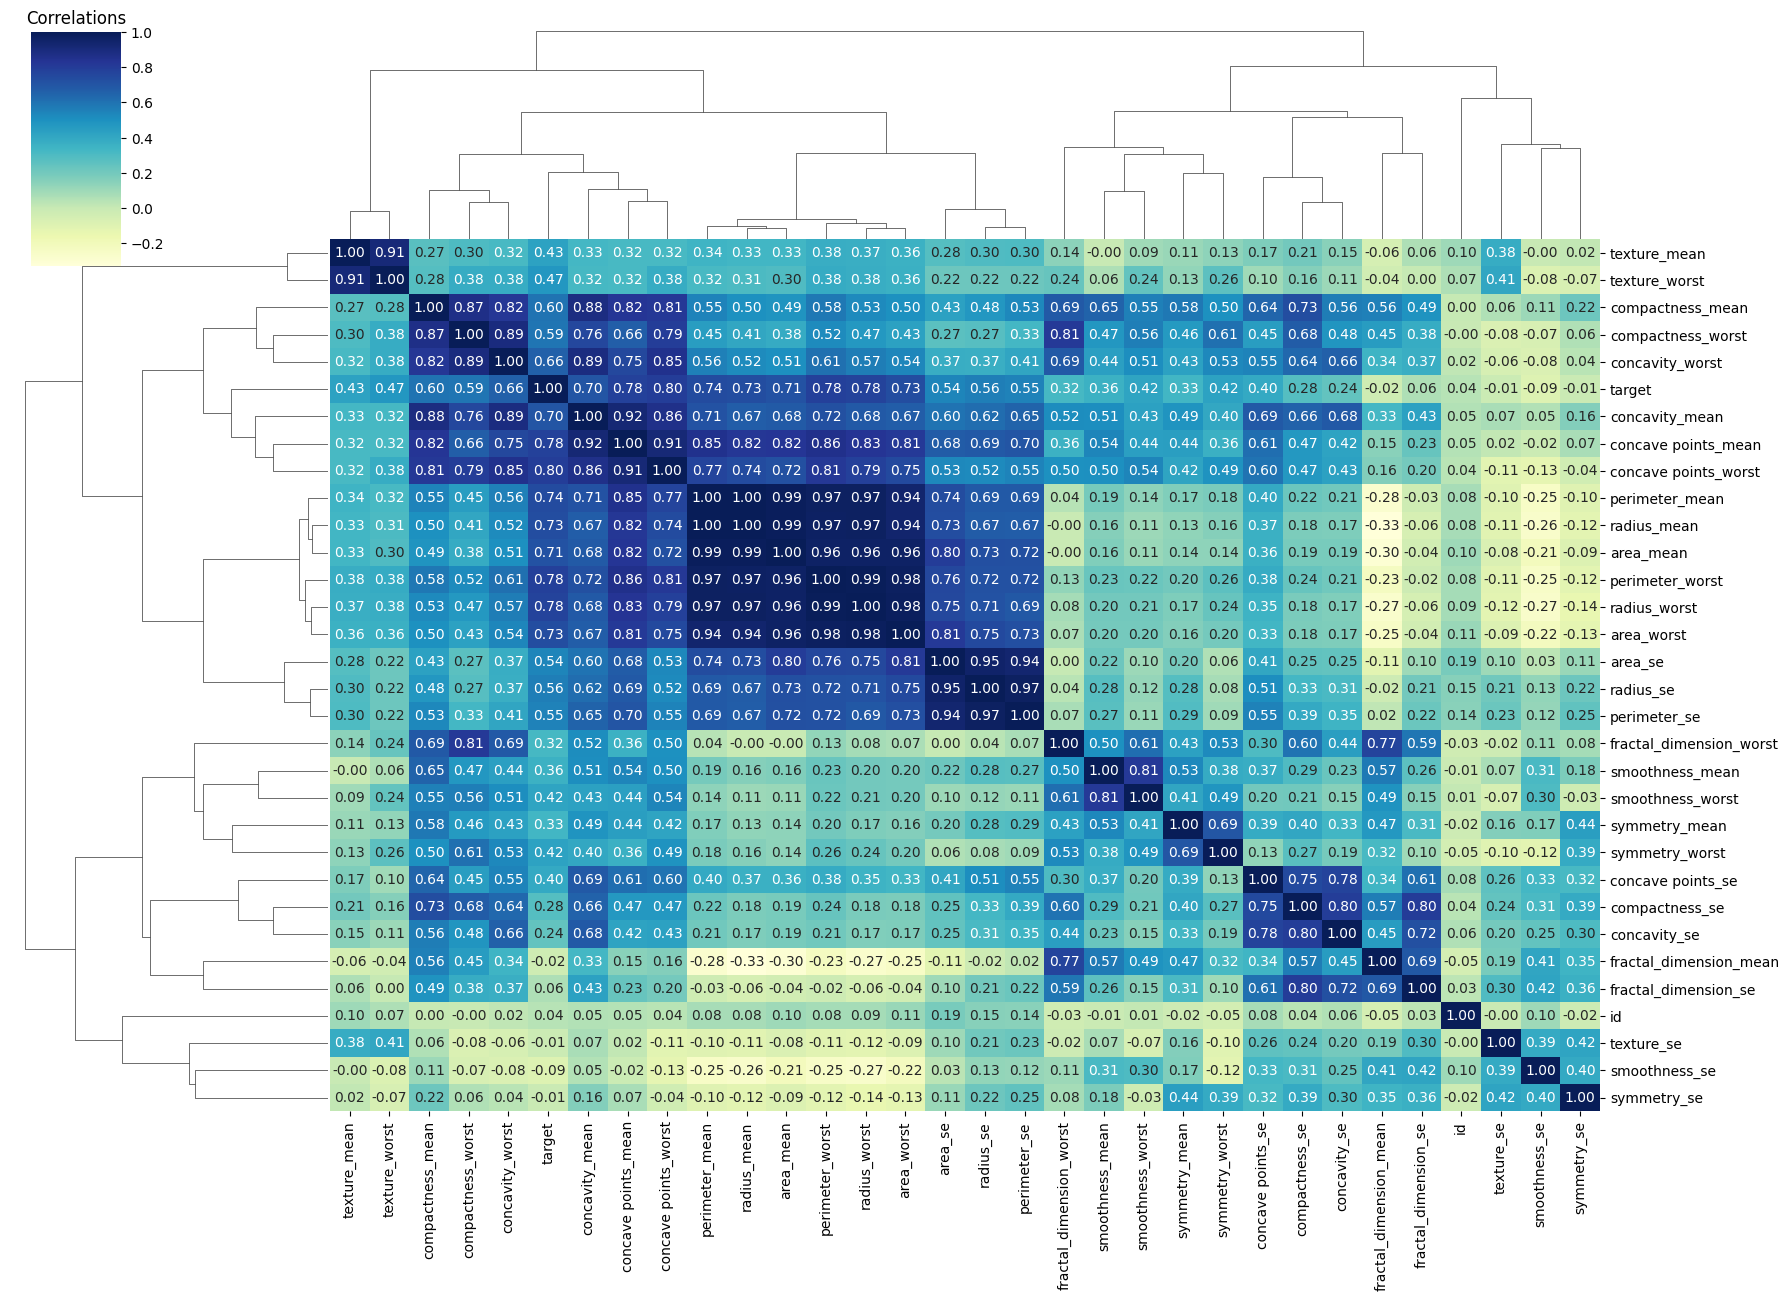

In [14]:
# Your answers here!
corr = df.corr()
sns.clustermap(corr, annot=True, fmt = '.2f', figsize=(18,13), cmap='YlGnBu')
plt.title('Correlations')

## Finding the top features
The correlation map is too big. It is hard to extract useful information.<br>
Is there a way to filter out and find only those that are relevant for our target?

Text(0.5, 1.0, "Target's correlations greater than 0.75")

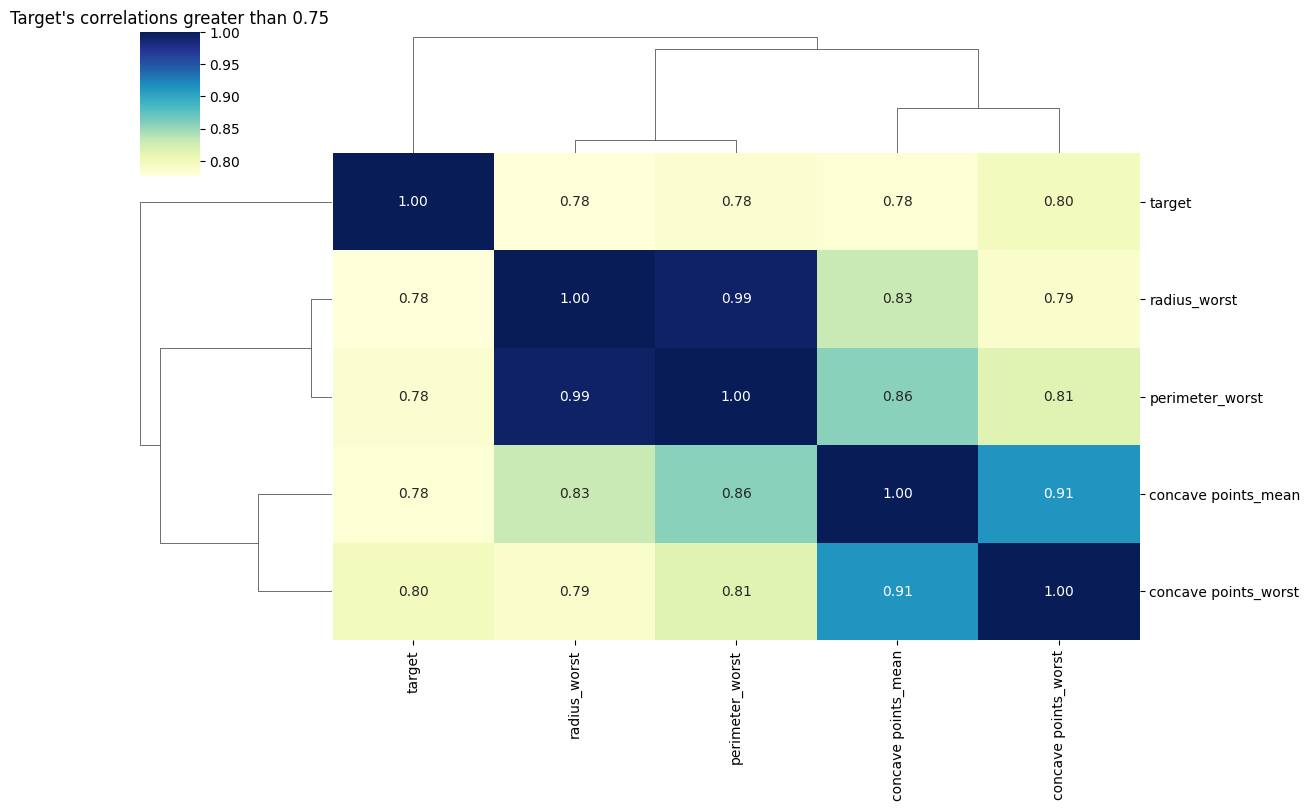

In [17]:
th = 0.75
filt = np.abs(corr['target']) > th

# Your answers here!
corr_feature = corr.columns[filt].tolist()
sns.clustermap(df[corr_feature].corr(),annot=True, fmt = '.2f', figsize=(12,8),cmap='YlGnBu')
plt.title("Target's correlations greater than " + str(th))

# Can you try other values besides th = 0.75?

In [29]:
# Let's use X to create the data for features
# Let's use y to create the data for target
# Your answers here!
X = df.drop(['target'], axis=1)
y = df['target']
columns = X.columns.tolist()

# Split the data for both training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
print('X_train.shape:', X_train.shape)
print('X_test.shape:', X_test.shape)

X_train.shape: (407, 31)
X_test.shape: (136, 31)


In [30]:
# Let's standardize the data so that the range of the features are similar
# Your answers here!
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df["target"] = y_train

# Section 4: Modeling

We will be using 3 models:<br>
1. KNN
2. SVM
3. Decision Tree <br>

We will compare how each one works.<br>
But before that, we will do some preparation first.

In [37]:
# Your answer here! (KNN)
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [40]:
# Your answer here! (SVM)
clf_svm = SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)


SVC()

In [33]:
# Your answer here! (Decision Tree)
clf_dt = DecisionTreeClassifier(random_state = 0)
clf_dt = clf_dt.fit(X_train, y_train)



# Section 5: Evaluation
We want to check the performance of our model. <br>
We want to know the accuracy of the results.

Test Score: 0.9632, Train Score: 0.9853
CM: 
 [[85  2]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        87
           1       0.96      0.94      0.95        49

    accuracy                           0.96       136
   macro avg       0.96      0.96      0.96       136
weighted avg       0.96      0.96      0.96       136



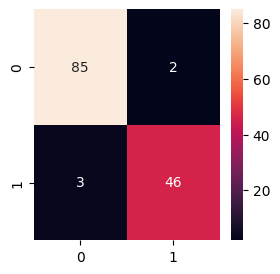

In [38]:
# Your answer here! (KNN)
y_pred_test1 = clf_knn.predict(X_test)
y_pred_train1 = clf_knn.predict(X_train)
cm = confusion_matrix(y_test, y_pred_test1)
acc_test = accuracy_score(y_test, y_pred_test1)
acc_train = accuracy_score(y_train, y_pred_train1)




print("Test Score: {}, Train Score: {}".format(round(acc_test,4), round(acc_train,4)))
print("CM: \n",cm)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred_test1))


Test Score: 0.9706, Train Score: 0.9902
CM: 
 [[85  2]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        87
           1       0.96      0.96      0.96        49

    accuracy                           0.97       136
   macro avg       0.97      0.97      0.97       136
weighted avg       0.97      0.97      0.97       136



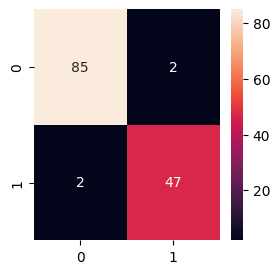

In [35]:
# Your answer here! (SVM)
y_pred_test2 = clf_svm.predict(X_test)
y_pred_train2 = clf_svm.predict(X_train)
cm2 = confusion_matrix(y_test, y_pred_test2)
acc_test2 = accuracy_score(y_test, y_pred_test2)
acc_train2 = accuracy_score(y_train, y_pred_train2)


print("Test Score: {}, Train Score: {}".format(round(acc_test2,4), round(acc_train2,4)))
print("CM: \n",cm2)
plt.figure(figsize=(3,3))
sns.heatmap(cm2, annot=True)
print(classification_report(y_test, y_pred_test2))


Test Score: 0.9265, Train Score: 1.0
CM: 
 [[84  3]
 [ 7 42]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        87
           1       0.93      0.86      0.89        49

    accuracy                           0.93       136
   macro avg       0.93      0.91      0.92       136
weighted avg       0.93      0.93      0.93       136



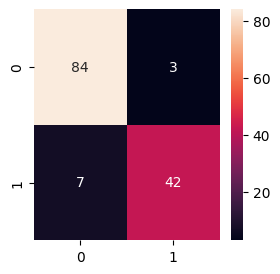

In [36]:
# Your answer here! (Decision Tree)
y_pred_test3 = clf_dt.predict(X_test)
y_pred_train3 = clf_dt.predict(X_train)
cm3 = confusion_matrix(y_test, y_pred_test3)
acc_test3 = accuracy_score(y_test, y_pred_test3)
acc_train3 = accuracy_score(y_train, y_pred_train3)





print("Test Score: {}, Train Score: {}".format(round(acc_test3,4), round(acc_train3,4)))
print("CM: \n",cm3)
plt.figure(figsize=(3,3))
sns.heatmap(cm3, annot=True)
print(classification_report(y_test, y_pred_test3))


# What is your best model?
In order to get best model, you will need to modify the parameters. <br>
Look back at the models in section 4, can you fine tune it better? <br><br>
What is your best model? How does it fare?

# Section 6: Deployment
What makes a good deployment? <br>
It has to be useful and easy to use. <br>
It needs to be updated frequently and easily.<br>
Deployment can be on-premise or online.<br>

In the cell below, write down your suggestions on how you can deploy this AI model.

In [ ]:
# Your answer here!
# The SVM model produced the most definitive results
# I would deploy this in a back end system where source data is ingested during a nightly data ETL
# of test results(I don't think a real time or streaming data source is necessary here).  The model would be used to
# generate either a self service report or a BI dashboard with graphic data.


# Other Reading Materials
You can get more information through these materials: <br>
1. https://www.breastcancer.org/symptoms/understand_bc/statistics
2. https://scikit-learn.org/stable/
3. https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
4. https://seaborn.pydata.org/generated/seaborn.clustermap.html
5. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
7. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
8. https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
9. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html